## Linear Regression on Boston Housing Dataset

We will take the Housing dataset which contains information about different houses in Boston. There are 506 samples and 13 feature variables in this dataset. 

The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define column names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
# load data, check pandas.read_csv usage: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
boston = pd.read_csv('E:\Sebnewrepo\Leo Study\week5\housing.csv', delim_whitespace=True, names=names)

In [4]:
print("Boston housing dataset has {} data points with {} variables each.".format(*boston.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [5]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### The features can be summarized as follows:

CRIM: Per capita crime rate by town<br />
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br />
INDUS: Proportion of non-retail business acres per town<br />
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br />
NOX: Nitric oxide concentration (parts per 10 million)<br />
RM: Average number of rooms per dwelling<br />
AGE: Proportion of owner-occupied units built prior to 1940<br />
DIS: Weighted distances to five Boston employment centers<br />
RAD: Index of accessibility to radial highways<br />
TAX: Full-value property tax rate per 10,000 dollars<br />
PTRATIO: Pupil-teacher ratio by town<br />
B: the proportion of people of African American descent by town<br />
LSTAT: Percentage of lower status of the population<br />
MEDV: Median value of owner-occupied homes in $1000s<br />

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [6]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

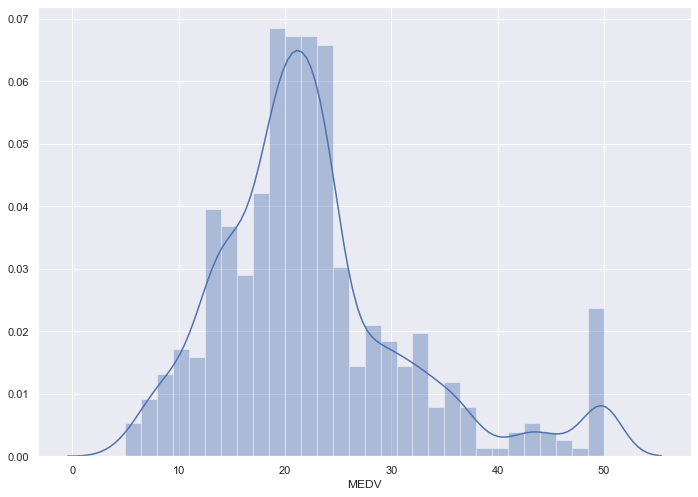

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers. You can also use the histogram plot function from the matplotlib library.

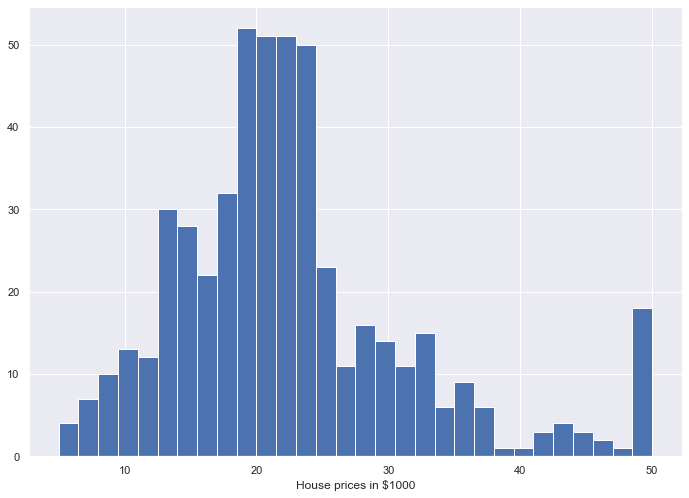

In [9]:
plt.hist(boston['MEDV'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

Let's see how these features plus MEDV distributions looks like

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


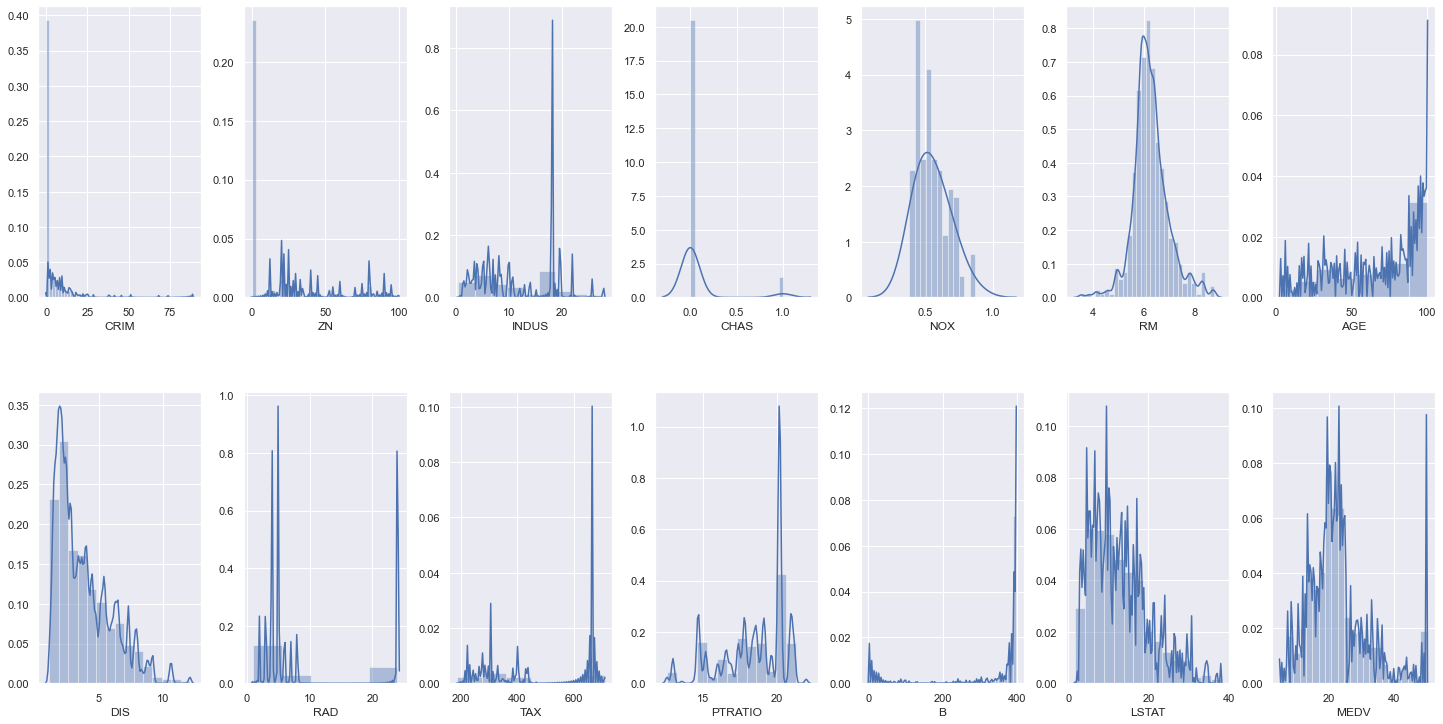

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index], kde_kws={'bw':0.1})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

In [12]:
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


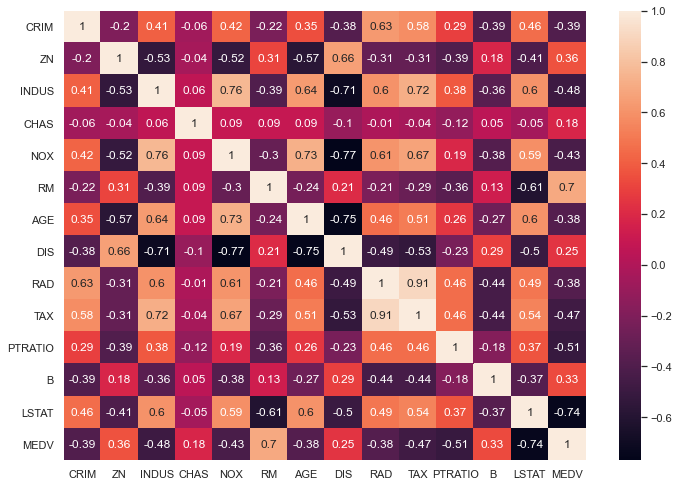

In [13]:
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

In [14]:
# statsmodels lib can generate a summary of linear regression

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Filter the result by MEDV < 50
boston = boston[boston['MEDV'] < 50]

# split the raw data into train and test
x = boston.iloc[:,0:13]
y = boston.iloc[:,13]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('train set shape')
print(x_train.shape, y_train.shape)
print('test set shape')
print(x_test.shape, y_test.shape)

def ols_lr(x,y):
    x = sm.add_constant(x) # add intercept
    model = sm.OLS(y,x).fit()
    print(model.summary())
    return model

def eval(y_test, y_pred):
    print('MAE')
    print(metrics.mean_absolute_error(y_test, y_pred))
    print('MSE')
    print(metrics.mean_squared_error(y_test, y_pred))
    plt.plot(y_test, y_pred,'o')
    plt.xlabel('true')
    plt.ylabel('predicted')
    return

train set shape
(392, 13) (392,)
test set shape
(98, 13) (98,)


#### Prediction without Log Transformation:
For feature selection, backward elimination is used here to reduce the predictors. So, fristly try not to eliminate the highly related pairs of variables.
##### 01. Use all predictors

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     103.7
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          7.26e-116
Time:                        12:33:22   Log-Likelihood:                -1053.0
No. Observations:                 392   AIC:                             2134.
Df Residuals:                     378   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7681      4.509      7.046      0.0

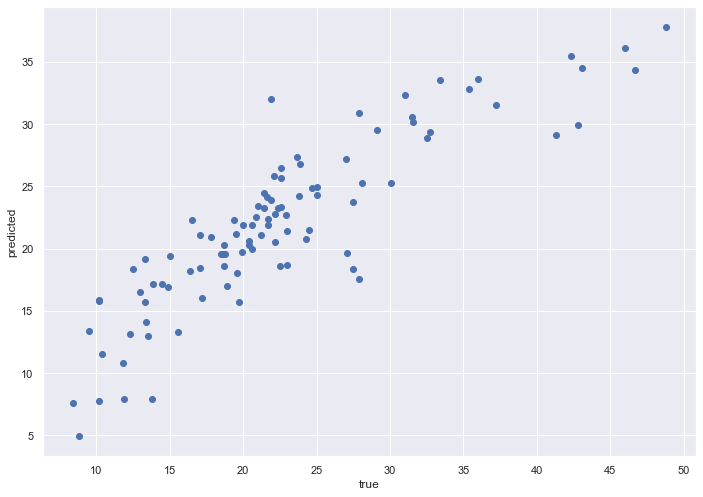

In [15]:
model1 = ols_lr(x_train,y_train)
x_test1 = sm.add_constant(x_test)
y_pred = model1.predict(x_test1)

eval(y_test,y_pred)

##### 02. Get rid of INDUS and AGE
The P-Value for INDUS and AGE is too high, get rid of them.

In [16]:
x_train1 = x_train.drop('INDUS',axis = 1)
x_train1 = x_train1.drop('AGE',axis = 1)
x_test1 = x_test.drop('INDUS',axis = 1)
x_test1 = x_test1.drop('AGE',axis = 1)


In [17]:
# do linear regression again:
model1 = ols_lr(x_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.32e-116
Time:                        12:33:22   Log-Likelihood:                -1056.3
No. Observations:                 392   AIC:                             2137.
Df Residuals:                     380   BIC:                             2184.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0922      4.502      7.351      0.0

MAE
3.1504582885317345
MSE
18.661558161399103


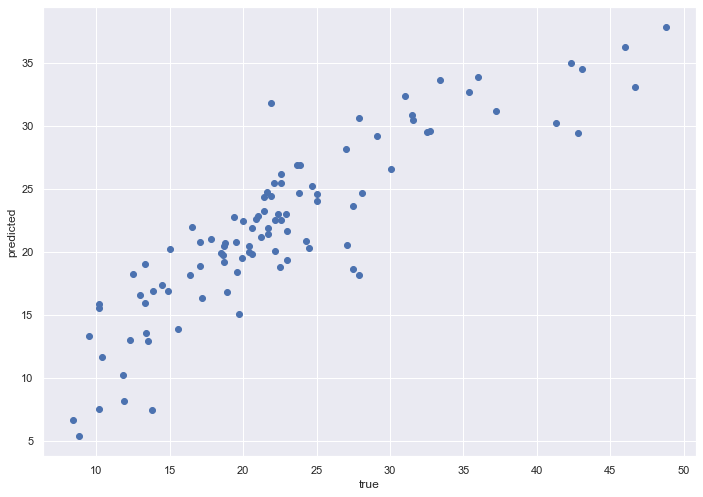

In [18]:
x_test11 = sm.add_constant(x_test1)
y_pred1 = model1.predict(x_test11)

eval(y_test,y_pred1)

##### 02. Get rid of other predictors
Now, get rid of one of the predictors in the pairs of RAD - TAX, DIS - NOX which have high correlation value

Try to get rid of RAD first:

In [19]:
x_train2 = x_train1.drop('RAD',axis = 1)

x_test2 = x_test1.drop('RAD',axis = 1)

model1 = ols_lr(x_train2,y_train)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     123.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          5.20e-113
Time:                        12:33:23   Log-Likelihood:                -1067.4
No. Observations:                 392   AIC:                             2157.
Df Residuals:                     381   BIC:                             2200.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0504      4.434      6.101      0.0

MAE
3.2753450399921653
MSE
19.710827146396603


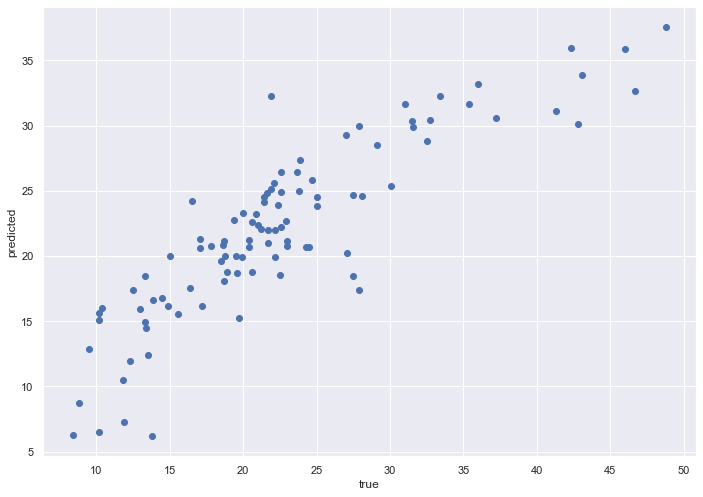

In [20]:
x_test21 = sm.add_constant(x_test2)
y_pred2 = model1.predict(x_test21)

eval(y_test,y_pred2)

Get rid of TAX

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     123.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          4.83e-113
Time:                        12:33:23   Log-Likelihood:                -1067.3
No. Observations:                 392   AIC:                             2157.
Df Residuals:                     381   BIC:                             2200.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0656      4.603      6.749      0.0

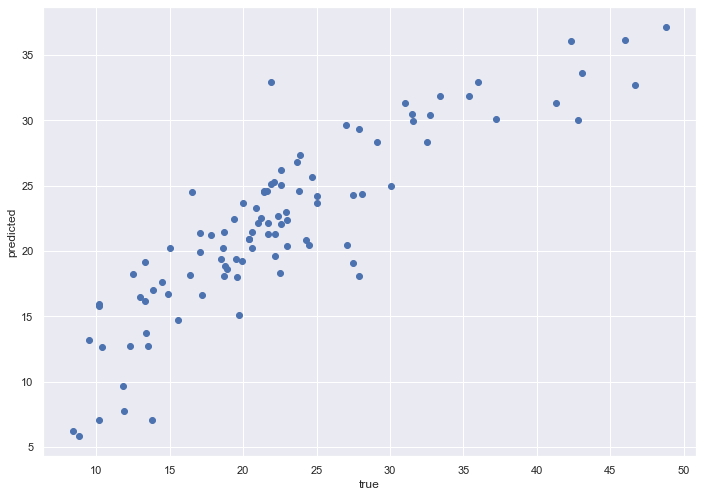

In [21]:
x_train3 = x_train1.drop('TAX',axis = 1)

x_test3 = x_test1.drop('TAX',axis = 1)
model1 = ols_lr(x_train3,y_train)

x_test31 = sm.add_constant(x_test3)
y_pred3 = model1.predict(x_test31)

eval(y_test,y_pred3)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     122.7
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          6.37e-107
Time:                        12:33:23   Log-Likelihood:                -1084.4
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     382   BIC:                             2229.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6315      4.355      4.507      0.0

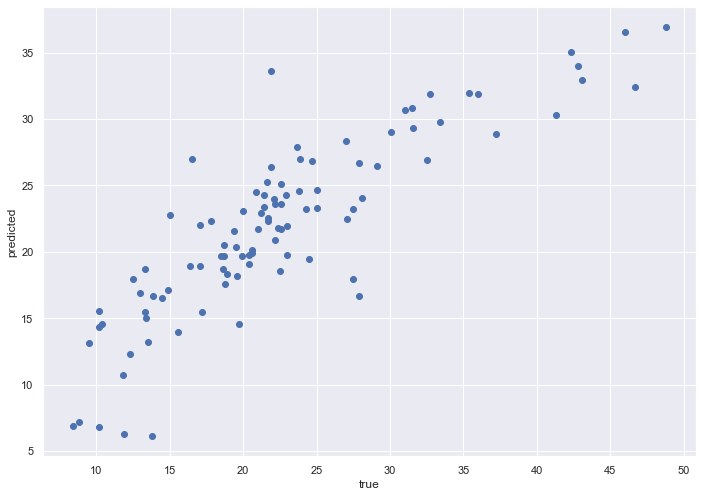

In [22]:
## get rid of DIS, the columns that are dropped are: DIS, TAX, INDUS, AGE
x_train4 = x_train3.drop('DIS',axis = 1)

x_test4 = x_test3.drop('DIS',axis = 1)

model1 = ols_lr(x_train4,y_train)
x_test41 = sm.add_constant(x_test4)
y_pred4 = model1.predict(x_test41)

eval(y_test,y_pred4)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     138.3
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          5.87e-108
Time:                        12:33:23   Log-Likelihood:                -1084.6
No. Observations:                 392   AIC:                             2187.
Df Residuals:                     383   BIC:                             2223.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9956      4.143      4.585      0.0

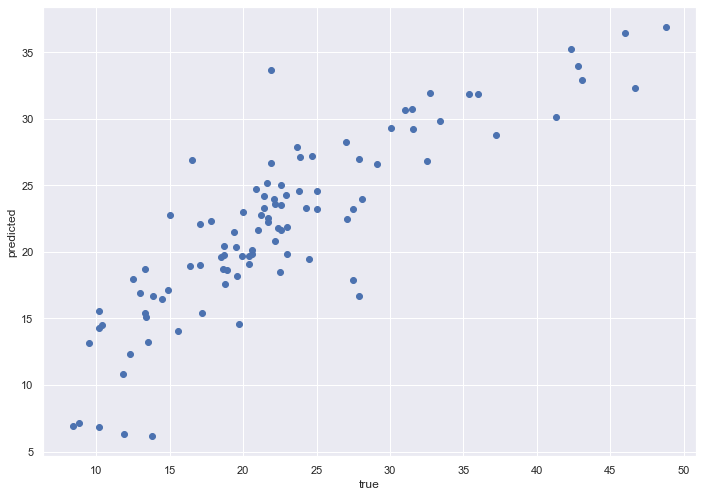

In [23]:
x_train5 = x_train4.drop('ZN',axis = 1)

x_test5 = x_test4.drop('ZN',axis = 1)

model1 = ols_lr(x_train5,y_train)
x_test51 = sm.add_constant(x_test5)
y_pred5 = model1.predict(x_test51)

eval(y_test,y_pred5)

#### Prediction with Log Transformation:
Some of the predictors have right skewed distribution, log transformation can be applied here to adjust the predictors' distribution.

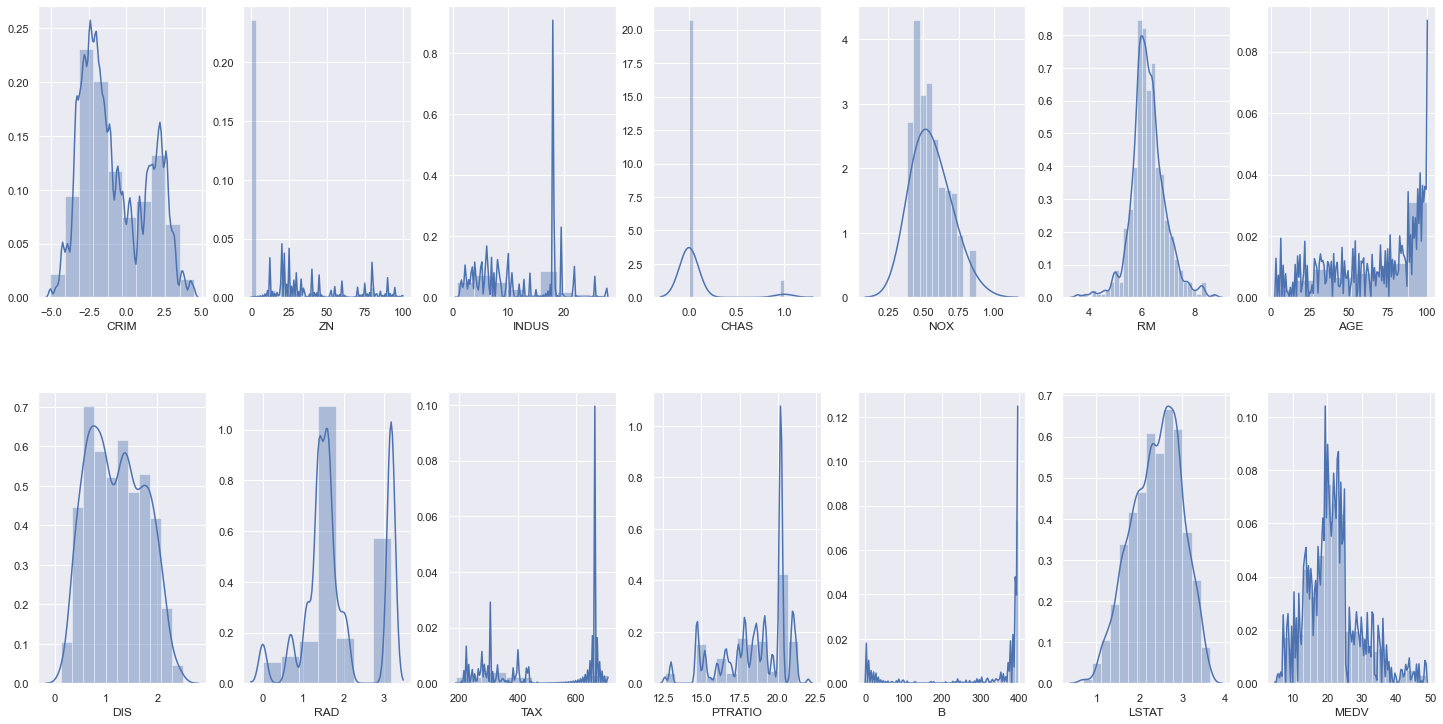

In [24]:
boston1 = pd.read_csv('E:\Sebnewrepo\Leo Study\week5\housing.csv', delim_whitespace=True, names=names)

# Filter the result by MEDV < 50
boston1 = boston1[boston1['MEDV'] < 50]

boston1['CRIM'] = np.log(boston1['CRIM'])
boston1['DIS'] = np.log(boston1['DIS'])
boston1['LSTAT'] = np.log(boston1['LSTAT'])
boston1['RAD'] = np.log(boston1['RAD'])

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston1.items():
    sns.distplot(v, ax=axs[index], kde_kws={'bw':0.1})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

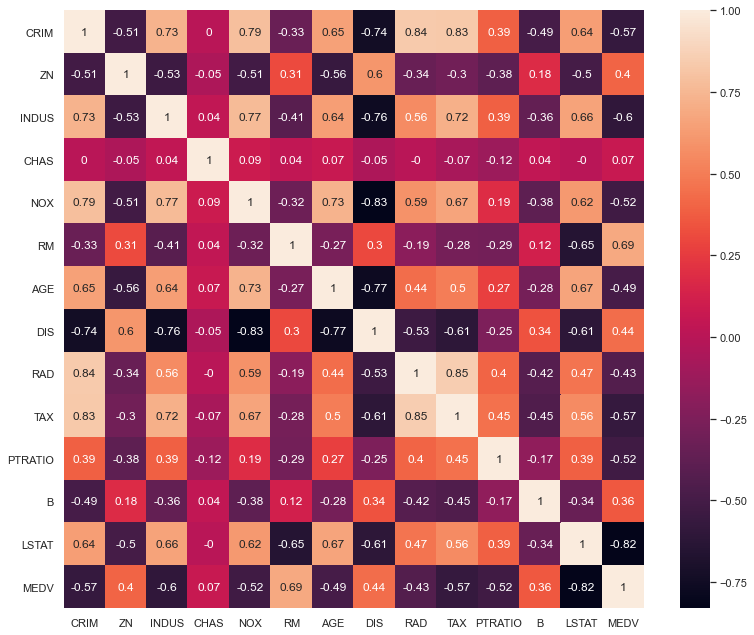

In [25]:
correlation_matrix1 = boston1.corr().round(2)
plt.figure(figsize=(13,11))
sns.heatmap(data = correlation_matrix1, annot=True)

In [26]:
x = boston1.iloc[:,0:13]
y = boston1.iloc[:,13]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('train set shape')
print(x_train.shape, y_train.shape)
print('test set shape')
print(x_test.shape, y_test.shape)

train set shape
(392, 13) (392,)
test set shape
(98, 13) (98,)


##### 01. Use all predictors

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     116.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.91e-123
Time:                        12:33:28   Log-Likelihood:                -1034.8
No. Observations:                 392   AIC:                             2098.
Df Residuals:                     378   BIC:                             2153.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9733      4.810      8.726      0.0

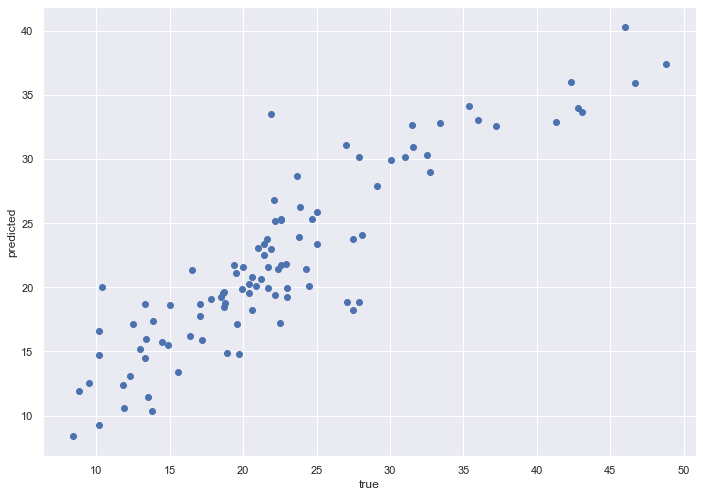

In [27]:
model1 = ols_lr(x_train,y_train)
x_test1 = sm.add_constant(x_test)
y_pred = model1.predict(x_test1)

eval(y_test,y_pred)

##### 02. Get rid of CRIM, ZN, INDUS

In [28]:
x_train1 = x_train.drop('INDUS',axis = 1)
x_train1 = x_train1.drop('ZN',axis = 1)
x_train1 = x_train1.drop('CRIM',axis = 1)
x_test1 = x_test.drop('INDUS',axis = 1)
x_test1 = x_test1.drop('ZN',axis = 1)
x_test1 = x_test1.drop('CRIM',axis = 1)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     152.2
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.97e-126
Time:                        12:33:29   Log-Likelihood:                -1035.4
No. Observations:                 392   AIC:                             2093.
Df Residuals:                     381   BIC:                             2137.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3011      4.623      9.367      0.0

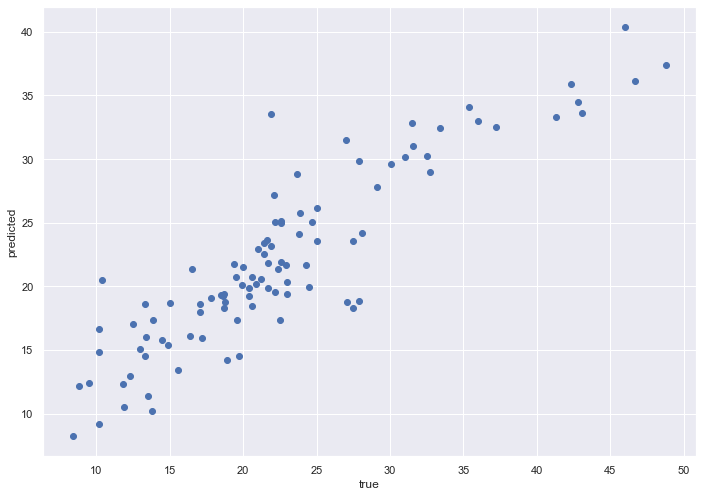

In [29]:
model1 = ols_lr(x_train1,y_train)
x_test11 = sm.add_constant(x_test1)
y_pred1 = model1.predict(x_test11)

eval(y_test,y_pred1)

##### 02. Get rid of AGE, RM, TAX, DIS
Age has a big P-value

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     169.5
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.62e-127
Time:                        12:33:29   Log-Likelihood:                -1035.5
No. Observations:                 392   AIC:                             2091.
Df Residuals:                     382   BIC:                             2131.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6531      4.549      9.596      0.0

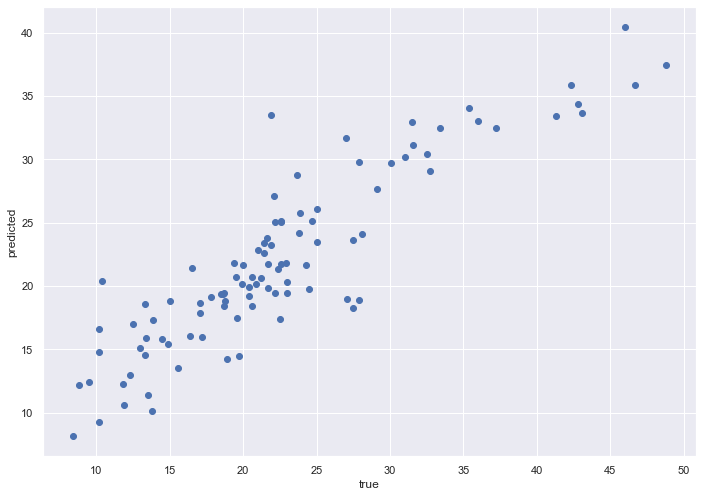

In [30]:

x_train2 = x_train1.drop('AGE',axis = 1)

x_test2 = x_test1.drop('AGE',axis = 1)
model1 = ols_lr(x_train2,y_train)
x_test21 = sm.add_constant(x_test2)
y_pred2 = model1.predict(x_test21)

eval(y_test,y_pred2)

get rid of AGE, TAX

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.49e-124
Time:                        12:33:29   Log-Likelihood:                -1045.3
No. Observations:                 392   AIC:                             2109.
Df Residuals:                     383   BIC:                             2144.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.0347      4.656      9.457      0.0

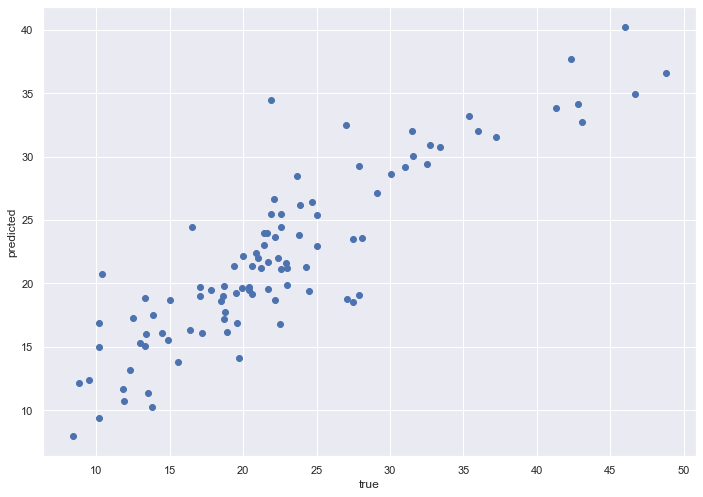

In [31]:

x_train3 = x_train2.drop('TAX',axis = 1)

x_test3 = x_test2.drop('TAX',axis = 1)
model1 = ols_lr(x_train3,y_train)
x_test31 = sm.add_constant(x_test3)
y_pred3 = model1.predict(x_test31)

eval(y_test,y_pred3)

Get Rid of AGE,DIS

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     172.5
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          5.99e-122
Time:                        12:33:29   Log-Likelihood:                -1051.4
No. Observations:                 392   AIC:                             2121.
Df Residuals:                     383   BIC:                             2157.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5409      3.964      7.452      0.0

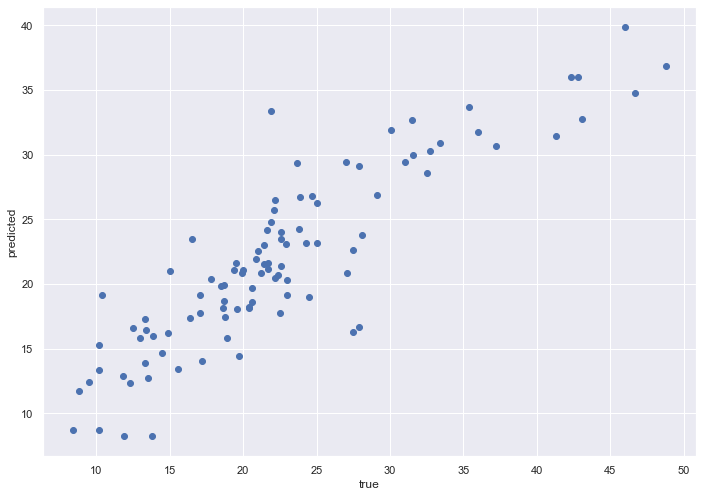

In [32]:

x_train4 = x_train2.drop('DIS',axis = 1)

x_test4 = x_test2.drop('DIS',axis = 1)
model1 = ols_lr(x_train4,y_train)
x_test41 = sm.add_constant(x_test4)
y_pred4 = model1.predict(x_test41)

eval(y_test,y_pred4)

Get Rid of AGE,DIS, RM

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     162.1
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.65e-110
Time:                        12:33:30   Log-Likelihood:                -1081.2
No. Observations:                 392   AIC:                             2178.
Df Residuals:                     384   BIC:                             2210.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.7216      2.359     23.623      0.0

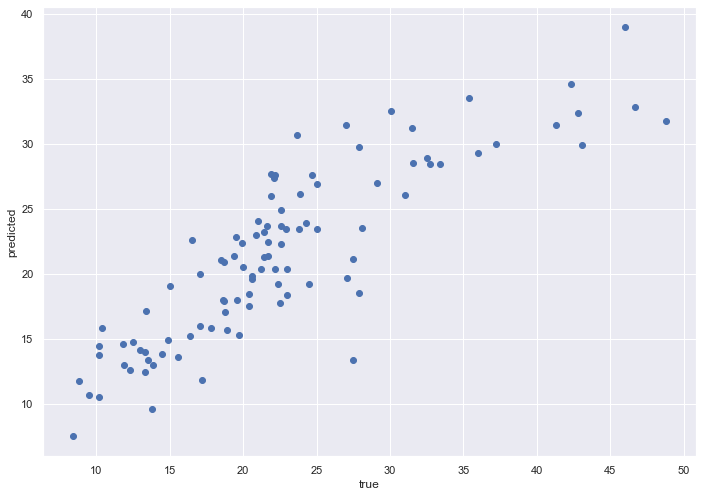

In [33]:
x_train5 = x_train4.drop('RM',axis = 1)

x_test5 = x_test4.drop('RM',axis = 1)
model1 = ols_lr(x_train5,y_train)
x_test51 = sm.add_constant(x_test5)
y_pred5 = model1.predict(x_test51)

eval(y_test,y_pred5)

get rid of AGE, RM, TAX, DIS

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     181.3
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          7.03e-109
Time:                        12:33:30   Log-Likelihood:                -1087.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     385   BIC:                             2217.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.2352      2.357     24.279      0.0

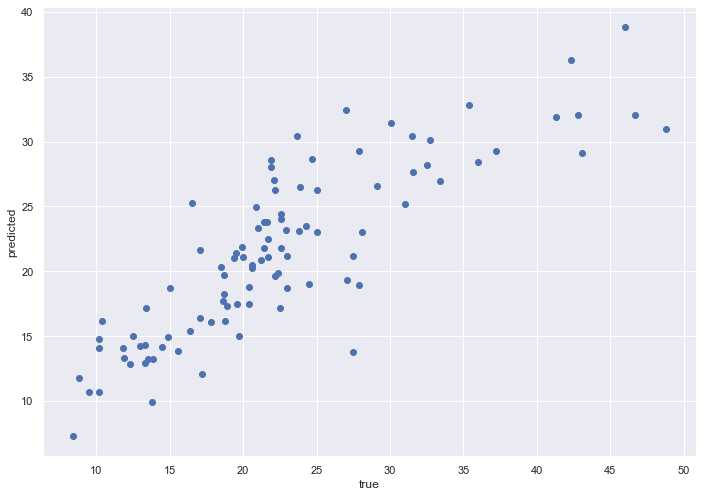

In [34]:
x_train6 = x_train5.drop('TAX',axis = 1)

x_test6 = x_test5.drop('TAX',axis = 1)
model1 = ols_lr(x_train6,y_train)
x_test61 = sm.add_constant(x_test6)
y_pred6 = model1.predict(x_test61)

eval(y_test,y_pred6)

#### Conclusion



1. Do log transformation to some of the predictors with right-skewed distribution can improve the performance of the linear regression model.

2. Get rid of some of the predictors with high p-value can improve the performance.

3. Getting rid of some preditors to avoid multi co-linearity maybe will increase the value of MAE, MSE, which means the performance of the model gets worse.